In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('cancerdata.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
data.shape
data.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'points_se',
       'symmetry_se', 'dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'points_worst',
       'symmetry_worst', 'dimension_worst'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [ ]:
features=data.iloc[:,2:].values
labels=data.iloc[:,1].values

In [ ]:
features.ndim

2

In [ ]:
labels.ndim

1

# visualisation

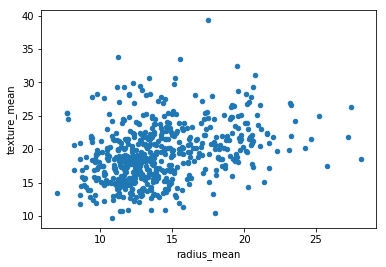

In [ ]:
#2-D scatter plot:
data.plot(kind='scatter', x='radius_mean', y='texture_mean') ;
plt.show()
#cannot make much sense out it. 

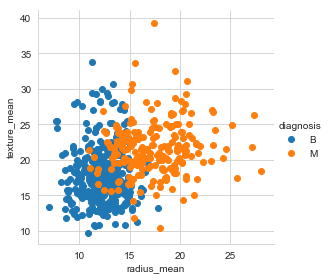

In [ ]:
# 2-D Scatter plot with color-coding for each cancer type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="diagnosis", size=4) \
   .map(plt.scatter, "radius_mean", "texture_mean") \
   .add_legend();
plt.show();

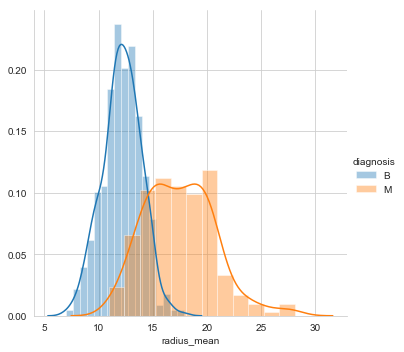

In [ ]:
sns.FacetGrid(data, hue="diagnosis", size=5) \
   .map(sns.distplot, "radius_mean") \
   .add_legend();
plt.show();



In [ ]:
sns.FacetGrid(data, hue="diagnosis", size=5) \
   .map(sns.distplot, "texture_mean") \
   .add_legend();
plt.show();

In [ ]:
sns.FacetGrid(data, hue="diagnosis", size=5) \
   .map(sns.distplot, "perimeter_mean") \
   .add_legend();
plt.show();

In [ ]:
sns.FacetGrid(data, hue="diagnosis", size=5) \
   .map(sns.distplot, "area_mean") \
   .add_legend();
plt.show();

In [ ]:
sns.FacetGrid(data, hue="diagnosis", size=5) \
   .map(sns.distplot, "smoothness_mean") \
   .add_legend();
plt.show();

In [ ]:
sns.pairplot(data,hue='diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

In [ ]:
sns.countplot(data['diagnosis'],label='count')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(),annot=True)

# support vector machine

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                labels,
                                                test_size=0.4,
                                                random_state=50)

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma=0.4, kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , model.predict(X_test))
cm

In [ ]:
y_predict = model.predict(X_test )
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels , model.predict(features)))

# Ensemble learning using Bagging Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                labels,
                                                test_size=0.2,
                                                random_state=45)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagClassifier = BaggingClassifier(n_estimators=103)

In [ ]:
bagClassifier.fit(X_train,y_train)

In [ ]:
print(bagClassifier.score(X_train,y_train))
print(bagClassifier.score(X_test,y_test))

# xgboost Random Forest classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                labels,
                                                test_size=0.2,
                                                random_state=44)

In [ ]:
from xgboost import XGBRFClassifier
model1 = XGBRFClassifier()
model1.fit(X_train,y_train)

In [ ]:
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , model1.predict(X_test))
cm

In [ ]:
y_predict = model1.predict(X_test )
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, model1.predict(features)))

In [ ]:
#deployment of model
#Deployment
#User Interaction Test
radius_mean = float(input("Enter radius mean "))
texture_mean= float(input("Enter texture_mean: "))
perimeter_mean = float(input("Enter perimeter_mean: "))
area_mean = float(input("Enter area_mean "))
smoothness_mean = float(input("Enter smoothness_mean: "))
compactness_mean=float(input("Enter compactness_mean "))
concavity_mean=float(input("Enter concavity_mean "))
points_mean=float(input("Enter points_mean "))
symmetry_mean=float(input("Enter_symmetry_mean "))
dimension_mean=float(input("Enter_dimension_mean "))
radius_se=float(input("Enter radius_se "))
texture_se=float(input("Enter texture_se "))
perimeter_se=float(input("Enter perimeter_se "))
area_se=float(input("Enter area_se "))
smoothness_se=float(input("Enter smoothness_se "))
compactness_se=float(input("Enter texture_se "))
concavity_se=float(input("Enter radius_se "))
points_se=float(input("Enter texture_se "))
symmetry_se=float(input("Enter radius_se "))
dimension_se=float(input("Enter texture_se "))
radius_worst=float(input("Enter radius_worst "))
texture_worst=float(input("Enter_texture_worst "))
perimeter_worst=float(input("Enter_perimeter_worst "))
area_worst=float(input("Enter_area_worst "))
smoothness_worst=float(input("Enter_smoothness_worst "))
compactness_worst=float(input("Enter_compactness_worst "))
concavity_worst=float(input("Enter_concavity_worst "))
points_worst=float(input("Enter_points_worst "))
symmetry_worst=float(input("Enter_symmetry_worst "))
dimension_worst=float(input("Enter_dimension_worst "))

features = np.array([[radius_mean, texture_mean, perimeter_mean,
       area_mean, smoothness_mean, compactness_mean,
       concavity_mean, points_mean, symmetry_mean, dimension_mean,
       radius_se, texture_se, perimeter_se, area_se,
       smoothness_se, compactness_se, concavity_se, points_se,
       symmetry_se, dimension_se, radius_worst, texture_worst,
       perimeter_worst, area_worst, smoothness_worst,
       compactness_worst, concavity_worst, points_worst,
       symmetry_worst, dimension_worst]])
diagnosis = model1.predict(features)
print("Predicted cancer is {}".format(diagnosis))

    